In [12]:
#Importing libraries for centrality measures
import os
import networkx as nx
import collections
from collections import Counter

#Importing libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### 1. Extracting EgoNode - 698

In [13]:
egoNode = 698
edges = []
with open('/Users/Chandu/256_ Project/facebook/' + str(egoNode) + '.edges') as files:
    print('ego network : ',str(egoNode))
            
    for i, line in enumerate(files):
        words = line.split()
        edges.append((egoNode, (int(words[0]))))
        edges.append((egoNode, (int(words[1]))))
        edges.append((int(words[0]), int(words[1])))
            
    g = nx.Graph(edges)

ego network :  698


### 2. Analyzing the Ego Network

In [14]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 331
Average degree:  10.6774


In [15]:
pos = nx.spring_layout(g)

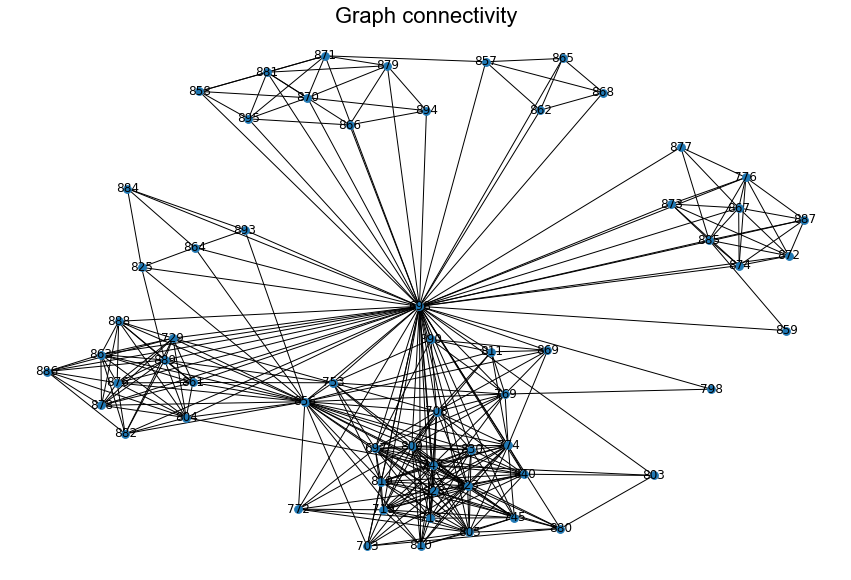

In [16]:
plt.figure(figsize=(15,10))
plt.title('Graph connectivity', fontsize=22, fontname='Arial')
nx.draw_networkx(g, pos=pos, with_labels= True, node_size= 60)
plt.axis('off')
plt.show()

In [11]:
print('The nodes in the EgoNode-698: ',g.nodes())

The nodes in the EgoNode-698:  [698, 881, 858, 828, 697, 884, 864, 856, 869, 889, 872, 873, 719, 713, 861, 863, 840, 803, 745, 805, 865, 857, 874, 708, 823, 885, 870, 871, 888, 825, 774, 729, 769, 800, 819, 859, 876, 887, 895, 890, 810, 879, 753, 830, 747, 776, 772, 804, 886, 893, 811, 867, 868, 878, 877, 882, 894, 866, 880, 703, 798, 862]


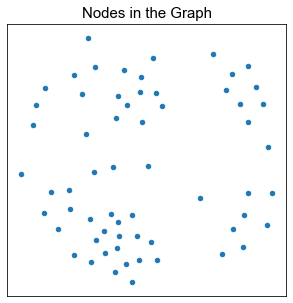

In [10]:
plt.rcParams['figure.figsize']=[5,5]
plt.title('Nodes in the Graph',fontsize=15, fontname='Arial')
nx.draw_networkx_nodes(g, pos, with_labels=True, node_size=20,font_size=50,label='Number of Nodes')

In [12]:
print('The edges in the EgoNode-698: ',g.edges())

The edges in the EgoNode-698:  [(698, 881), (698, 858), (698, 828), (698, 697), (698, 884), (698, 864), (698, 856), (698, 869), (698, 889), (698, 872), (698, 873), (698, 719), (698, 713), (698, 861), (698, 863), (698, 840), (698, 803), (698, 745), (698, 805), (698, 865), (698, 857), (698, 874), (698, 708), (698, 823), (698, 885), (698, 870), (698, 871), (698, 888), (698, 825), (698, 774), (698, 729), (698, 769), (698, 800), (698, 819), (698, 859), (698, 876), (698, 887), (698, 895), (698, 890), (698, 810), (698, 879), (698, 753), (698, 830), (698, 747), (698, 776), (698, 772), (698, 804), (698, 886), (698, 893), (698, 811), (698, 867), (698, 868), (698, 878), (698, 877), (698, 882), (698, 894), (698, 866), (698, 880), (698, 703), (698, 798), (698, 862), (881, 858), (881, 895), (881, 879), (881, 871), (881, 866), (881, 870), (858, 870), (858, 895), (858, 871), (828, 697), (828, 772), (828, 810), (828, 819), (828, 856), (828, 880), (828, 703), (828, 769), (828, 830), (828, 823), (828, 74

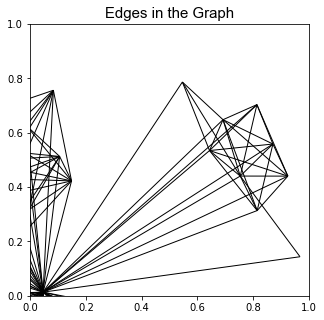

In [13]:
plt.rcParams['figure.figsize']=[5,5]
plt.title('Edges in the Graph',fontsize=15, fontname='Arial')
nx.draw_networkx_edges(g, pos, with_labels=True, node_size=20,font_size=50,label='Number of Edges')

##### Is the graph connected?

In [20]:
# returns True or False whether Graph is connected 
print("Is the graph connected?\n",nx.is_connected(g)) 

Is the graph connected?
 True


##### Number of different connected components?

In [15]:
# returns number of different connected components 
print(nx.number_connected_components(g)) 

1


##### List of connected components?

In [17]:
# returns list of nodes in different connected components 
print("The list of connected comonents in the graph",list(nx.connected_components(g))) 

The list of connected comonents in the graph [{769, 772, 774, 776, 798, 800, 803, 804, 805, 810, 811, 819, 823, 825, 697, 698, 828, 830, 703, 708, 840, 713, 719, 889, 856, 857, 858, 729, 859, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 745, 874, 876, 747, 878, 879, 880, 877, 881, 753, 882, 884, 885, 886, 887, 888, 890, 893, 894, 895}]


##### Diameter of the graph

In [21]:
#The maximum shortest distance between a pair of nodes in a graph G is its Diamater. 
#It is the largest possible eccentricity value of a node
print("Diameter: ", nx.diameter(g))

Diameter:  2


# Identifying the Most Influential User

### 1. Degree Centrality

In [22]:
#Function definition for degree centrality
def degree_centrality(G):
    centrality = {}
    s = 1.0 / (len(G) - 1.0)
    centrality = {n: d * s for n, d in G.degree()}
    return centrality

In [42]:
deg_cen = degree_centrality(g)
print('The degree centrality of all nodes in the network => \n', deg_cen)

The degree centrality of all nodes in the network => 
 {698: 1.0, 881: 0.11475409836065574, 858: 0.0819672131147541, 828: 0.3278688524590164, 697: 0.29508196721311475, 884: 0.06557377049180328, 864: 0.0819672131147541, 856: 0.49180327868852464, 869: 0.11475409836065574, 889: 0.21311475409836067, 872: 0.11475409836065574, 873: 0.09836065573770492, 719: 0.27868852459016397, 713: 0.26229508196721313, 861: 0.1639344262295082, 863: 0.18032786885245902, 840: 0.22950819672131148, 803: 0.06557377049180328, 745: 0.19672131147540983, 805: 0.27868852459016397, 865: 0.06557377049180328, 857: 0.0819672131147541, 874: 0.11475409836065574, 708: 0.29508196721311475, 823: 0.3114754098360656, 885: 0.14754098360655737, 870: 0.11475409836065574, 871: 0.11475409836065574, 888: 0.14754098360655737, 825: 0.0819672131147541, 774: 0.29508196721311475, 729: 0.19672131147540983, 769: 0.21311475409836067, 800: 0.27868852459016397, 819: 0.26229508196721313, 859: 0.03278688524590164, 876: 0.18032786885245902, 887: 

(-1.0417269665097932,
 1.1142227588842808,
 -0.9087815259506009,
 1.0018270755529586)

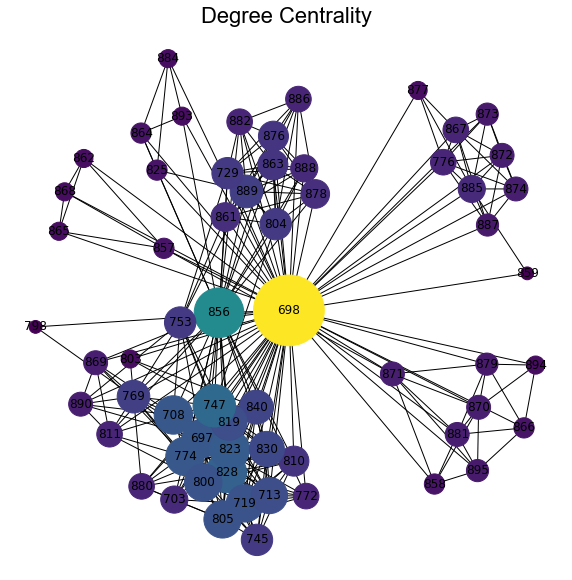

In [35]:
#the node color varies with Degree and node size with Degree Centrality
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 5000 for v in deg_cen.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=True,
                         node_color=node_color,
                         node_size=node_size )
plt.title("Degree Centrality", fontsize=22, fontname='Arial')
plt.axis('off')

In [80]:
# Top 10 nodes with the largest values of PageRank values in their descending order
list1 = dict(Counter(deg_cen).most_common(10))
print('Top 10 nodes with the largest values of degree centrality values: ')
dict(Counter(deg_cen).most_common(10))

Top 10 nodes with the largest values of degree centrality values: 


{698: 1.0,
 856: 0.49180327868852464,
 747: 0.36065573770491804,
 828: 0.3278688524590164,
 823: 0.3114754098360656,
 697: 0.29508196721311475,
 708: 0.29508196721311475,
 774: 0.29508196721311475,
 719: 0.27868852459016397,
 805: 0.27868852459016397}

### 2. Betweenness Centrality

In [36]:
# helpers for betweenness centrality

def _single_source_shortest_path_basic(G, s):
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    D[s] = 0
    Q = [s]
    while Q:   # use BFS to find shortest paths
        v = Q.pop(0)
        S.append(v)
        Dv = D[v]
        sigmav = sigma[v]
        for w in G[v]:
            if w not in D:
                Q.append(w)
                D[w] = Dv + 1
            if D[w] == Dv + 1:   # this is a shortest path, count paths
                sigma[w] += sigmav
                P[w].append(v)  # predecessors
    return S, P, sigma


def _single_source_dijkstra_path_basic(G, s, weight):
    # modified from Eppstein
    S = []
    P = {}
    for v in G:
        P[v] = []
    sigma = dict.fromkeys(G, 0.0)    # sigma[v]=0 for v in G
    D = {}
    sigma[s] = 1.0
    push = heappush
    pop = heappop
    seen = {s: 0}
    c = count()
    Q = []   # use Q as heap with (distance,node id) tuples
    push(Q, (0, next(c), s, s))
    while Q:
        (dist, _, pred, v) = pop(Q)
        if v in D:
            continue  # already searched this node.
        sigma[v] += sigma[pred]  # count paths
        S.append(v)
        D[v] = dist
        for w, edgedata in G[v].items():
            vw_dist = dist + edgedata.get(weight, 1)
            if w not in D and (w not in seen or vw_dist < seen[w]):
                seen[w] = vw_dist
                push(Q, (vw_dist, next(c), v, w))
                sigma[w] = 0.0
                P[w] = [v]
            elif vw_dist == seen[w]:  # handle equal paths
                sigma[w] += sigma[v]
                P[w].append(v)
    return S, P, sigma

def _accumulate_basic(betweenness, S, P, sigma, s):
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1.0 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w]
    return betweenness


def _accumulate_endpoints(betweenness, S, P, sigma, s):
    betweenness[s] += len(S) - 1
    delta = dict.fromkeys(S, 0)
    while S:
        w = S.pop()
        coeff = (1.0 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness[w] += delta[w] + 1
    return betweenness

def _rescale(betweenness, n, normalized, directed=False, k=None):
    if normalized:
        if n <= 2:
            scale = None  # no normalization b=0 for all nodes
        else:
            scale = 1.0 / ((n - 1) * (n - 2))
    else:  # rescale by 2 for undirected graphs
        if not directed:
            scale = 0.5
        else:
            scale = None
    if scale is not None:
        if k is not None:
            scale = scale * n / k
        for v in betweenness:
            betweenness[v] *= scale
    return betweenness

In [37]:
def betweenness_centrality(G, k=None, normalized=True, weight=None, 
                           endpoints=False, seed=None): 
    betweenness = dict.fromkeys(G, 0.0)  # b[v]=0 for v in G 
    if k is None: 
        nodes = G 
    else: 
        random.seed(seed) 
        nodes = random.sample(G.nodes(), k) 
    for s in nodes: 
  
        # single source shortest paths 
        if weight is None:  # use BFS 
            S, P, sigma = _single_source_shortest_path_basic(G, s) 
        else:  # use Dijkstra's algorithm 
            S, P, sigma = _single_source_dijkstra_path_basic(G, s, weight) 
  
        # accumulation 
        if endpoints: 
            betweenness = _accumulate_endpoints(betweenness, S, P, sigma, s) 
        else: 
            betweenness = _accumulate_basic(betweenness, S, P, sigma, s) 
  
    # rescaling 
    betweenness = _rescale(betweenness, len(G), normalized=normalized, 
                           directed=G.is_directed(), k=k) 
    return betweenness

In [41]:
bet_cen = betweenness_centrality(g)
print('The betweenness centrality of all nodes in the network => \n', bet_cen)

The betweenness centrality of all nodes in the network => 
 {698: 0.7088708437888765, 881: 0.0006739526411657558, 858: 0.0, 828: 0.004630016310344178, 697: 0.004891944728010301, 884: 0.0001366120218579235, 864: 0.000273224043715847, 856: 0.06321669071669073, 869: 0.0001873536299765808, 889: 0.003208430913348946, 872: 9.107468123861566e-05, 873: 0.0, 719: 0.002082594090790812, 713: 0.0012967496983890426, 861: 0.0005282331511839709, 863: 0.0004488680718188915, 840: 0.002026561780660141, 803: 7.8064012490242e-05, 745: 0.0001407517800960424, 805: 0.0027960124271599685, 865: 0.0, 857: 0.000819672131147541, 874: 9.107468123861566e-05, 708: 0.0053336902927066865, 823: 0.003723606387540814, 885: 0.002550091074681238, 870: 0.0010200364298724954, 871: 0.0016120218579234974, 888: 0.0, 825: 0.0005919854280510018, 774: 0.0048180204737581795, 729: 0.0012958626073380172, 769: 0.004719620088472547, 800: 0.003118393446262298, 819: 0.0021950499409515807, 859: 0.0, 876: 0.0004488680718188915, 887: 0.0, 8

(-1.0289160713341388,
 1.0975964116761574,
 -0.878858939089103,
 0.9840805152757403)

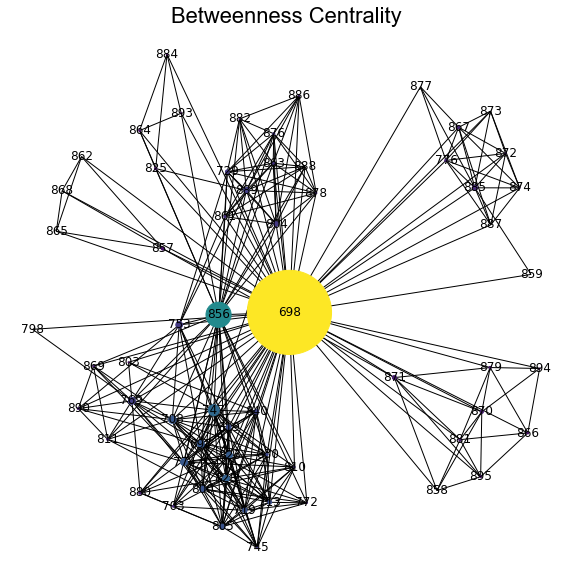

In [44]:
#the node color varies with Degree and node size with Degree Centrality
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in bet_cen.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=True,
                         node_color=node_color,
                         node_size=node_size )
plt.title("Betweenness Centrality", fontsize=22, fontname='Arial')
plt.axis('off')

In [79]:
# Top 10 nodes with the largest values of PageRank values in their descending order
list2 = dict(Counter(bet_cen).most_common(10))
print('Top 10 nodes with the largest values of betweenness centrality values: ')
dict(Counter(bet_cen).most_common(10))

Top 10 nodes with the largest values of betweenness centrality values: 


{698: 0.7088708437888765,
 856: 0.06321669071669073,
 747: 0.012033086828168796,
 708: 0.0053336902927066865,
 697: 0.004891944728010301,
 774: 0.0048180204737581795,
 769: 0.004719620088472547,
 828: 0.004630016310344178,
 753: 0.0045513487726602485,
 823: 0.003723606387540814}

### 3. Closeness Centrality

In [45]:
#Defining the closeness centrality function
def closeness_centrality(G, u=None, distance=None, normalized=True): 
    if distance is not None: 
  
        # use Dijkstra's algorithm with specified attribute as edge weight  
        path_length = functools.partial(nx.single_source_dijkstra_path_length, 
                                        weight=distance) 
    else: 
        path_length = nx.single_source_shortest_path_length 
  
    if u is None: 
        nodes = G.nodes() 
    else: 
        nodes = [u] 
    closeness_centrality = {} 
    for n in nodes: 
        sp = path_length(G,n) 
        totsp = sum(sp.values()) 
        if totsp > 0.0 and len(G) > 1: 
            closeness_centrality[n] = (len(sp)-1.0) / totsp 
  
            # normalize to number of nodes-1 in connected part 
            if normalized: 
                s = (len(sp)-1.0) / ( len(G) - 1 ) 
                closeness_centrality[n] *= s 
        else: 
            closeness_centrality[n] = 0.0
    if u is not None: 
        return closeness_centrality[u] 
    else: 
        return closeness_centrality 

In [46]:
clo_cen = closeness_centrality(g)
print('The closeness centrality of all nodes in the network => \n', clo_cen)

The closeness centrality of all nodes in the network => 
 {698: 1.0, 881: 0.5304347826086957, 858: 0.5213675213675214, 828: 0.5980392156862745, 697: 0.5865384615384616, 884: 0.5169491525423728, 864: 0.5213675213675214, 856: 0.6630434782608695, 869: 0.5304347826086957, 889: 0.5596330275229358, 872: 0.5304347826086957, 873: 0.5258620689655172, 719: 0.580952380952381, 713: 0.5754716981132075, 861: 0.5446428571428571, 863: 0.5495495495495496, 840: 0.5648148148148148, 803: 0.5169491525423728, 745: 0.5545454545454546, 805: 0.580952380952381, 865: 0.5169491525423728, 857: 0.5213675213675214, 874: 0.5304347826086957, 708: 0.5865384615384616, 823: 0.5922330097087378, 885: 0.5398230088495575, 870: 0.5304347826086957, 871: 0.5304347826086957, 888: 0.5398230088495575, 825: 0.5213675213675214, 774: 0.5865384615384616, 729: 0.5545454545454546, 769: 0.5596330275229358, 800: 0.580952380952381, 819: 0.5754716981132075, 859: 0.5083333333333333, 876: 0.5495495495495496, 887: 0.5258620689655172, 895: 0.52

(-1.0673753724024715,
 1.1354142570952566,
 -0.9188625953538196,
 1.022806282504471)

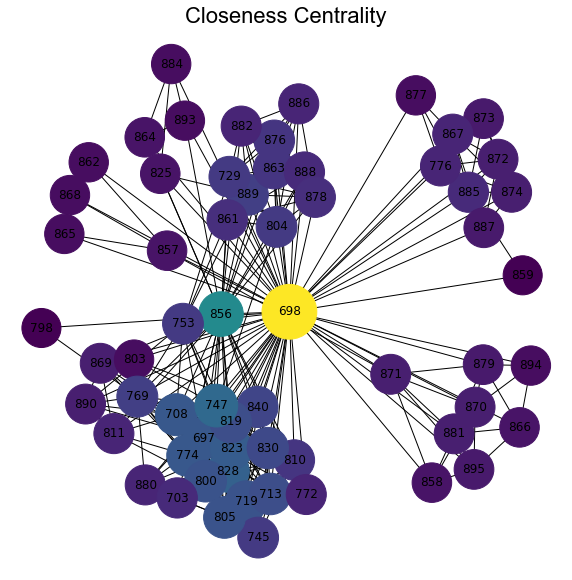

In [49]:
#the node color varies with Degree and node size with Degree Centrality
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 3000 for v in clo_cen.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=True,
                         node_color=node_color,
                         node_size=node_size )
plt.title("Closeness Centrality", fontsize=22, fontname='Arial')
plt.axis('off')

In [78]:
# Top 10 nodes with the largest values of PageRank values in their descending order
list3 = dict(Counter(clo_cen).most_common(10))
print('Top 10 nodes with the largest values of Closeness centrality values: ')
dict(Counter(clo_cen).most_common(10))

Top 10 nodes with the largest values of Closeness centrality values: 


{698: 1.0,
 856: 0.6630434782608695,
 747: 0.61,
 828: 0.5980392156862745,
 823: 0.5922330097087378,
 697: 0.5865384615384616,
 708: 0.5865384615384616,
 774: 0.5865384615384616,
 719: 0.580952380952381,
 805: 0.580952380952381}

### 4. PageRank

In [19]:
#Defining the page rank function
def pagerank(G, alpha=0.85, personalization=None, 
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight', 
             dangling=None): 

    if len(G) == 0: 
        return {} 

    if not G.is_directed(): 
        D = G.to_directed() 
    else: 
        D = G 

# Create a copy in (right) stochastic form 
    W = nx.stochastic_graph(D, weight=weight) 
    N = W.number_of_nodes() 

# Choose fixed starting vector if not given 
    if nstart is None: 
        x = dict.fromkeys(W, 1.0 / N) 
    else: 
# Normalized nstart vector 
        s = float(sum(nstart.values())) 
        x = dict((k, v / s) for k, v in nstart.items()) 

    if personalization is None: 

# Assign uniform personalization vector if not given 
        p = dict.fromkeys(W, 1.0 / N) 
    else: 
        missing = set(G) - set(personalization) 
        if missing: 
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(personalization.values())) 
        p = dict((k, v / s) for k, v in personalization.items()) 

    if dangling is None: 

# Use personalization vector if dangling vector not specified 
        dangling_weights = p 
    else: 
        missing = set(G) - set(dangling) 
        if missing: 
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(dangling.values())) 
        dangling_weights = dict((k, v/s) for k, v in dangling.items()) 
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0] 

# power iteration: make up to max_iter iterations 
    for _ in range(max_iter): 
        xlast = x 
        x = dict.fromkeys(xlast.keys(), 0) 
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes) 
        for n in x: 

# this matrix multiply looks odd because it is 
# doing a left multiply x^T=xlast^T*W 
            for nbr in W[n]: 
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight] 
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n] 

# check convergence, l1 norm 
        err = sum([abs(x[n] - xlast[n]) for n in x]) 
        if err < N*tol: 
            return x 
    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter) 


In [20]:
pr = pagerank(g, alpha=0.8)
print('The PageRank values of all nodes in the network => \n', pr)

The PageRank values of all nodes in the network => 
 {698: 0.0887770055460701, 881: 0.015105091614804455, 858: 0.011363947609938224, 828: 0.023256198483064414, 697: 0.02133271556769799, 884: 0.009532825357543096, 864: 0.01072058934111007, 856: 0.03736973330506135, 869: 0.010833574729651137, 889: 0.018721759499528996, 872: 0.01419305354749698, 873: 0.012485482656793117, 719: 0.01997499632236686, 713: 0.018886301360370308, 861: 0.014584828569001167, 863: 0.01602077268498188, 840: 0.017279796712361392, 803: 0.007484491713241196, 745: 0.014831226032501959, 805: 0.020171384718832685, 865: 0.01065801201400196, 857: 0.012526547267539824, 874: 0.01419305354749698, 708: 0.021646949407489846, 823: 0.022105697209108516, 885: 0.018436447637242594, 870: 0.015189701797339455, 871: 0.01523379040838138, 888: 0.013490227299506025, 825: 0.010160584780825654, 774: 0.02135431624924024, 729: 0.017107664549225236, 769: 0.01799474670477849, 800: 0.020222932163504414, 819: 0.019128233871509383, 859: 0.0060291

(-1.0396973138580894,
 1.0977453061993216,
 -0.940414476659051,
 1.1042938676823961)

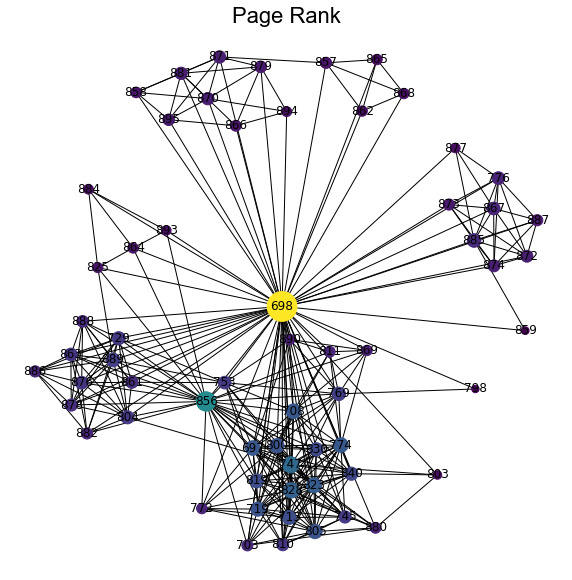

In [23]:
#the node color varies with Degree and node size with Degree Centrality
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 10000 for v in pr.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(g, pos=pos, with_labels=True,
                         node_color=node_color,
                         node_size=node_size )
plt.title("Page Rank", fontsize=22, fontname='Arial')
plt.axis('off')

In [70]:
# Top 10 nodes with the largest values of PageRank values in their descending order
list4 = dict(Counter(pr).most_common(10))
print('Top 10 nodes with the largest values of PageRank values: ')
dict(Counter(pr).most_common(10))

Top 10 nodes with the largest values of PageRank values: 


{698: 0.0887770055460701,
 856: 0.03736973330506135,
 747: 0.02583402328596435,
 828: 0.023256198483064414,
 823: 0.022105697209108516,
 708: 0.021646949407489846,
 774: 0.02135431624924024,
 697: 0.02133271556769799,
 800: 0.020222932163504414,
 805: 0.020171384718832685}

## Comparing centrality measures

Text(0.5, 1.0, 'Page Rank')

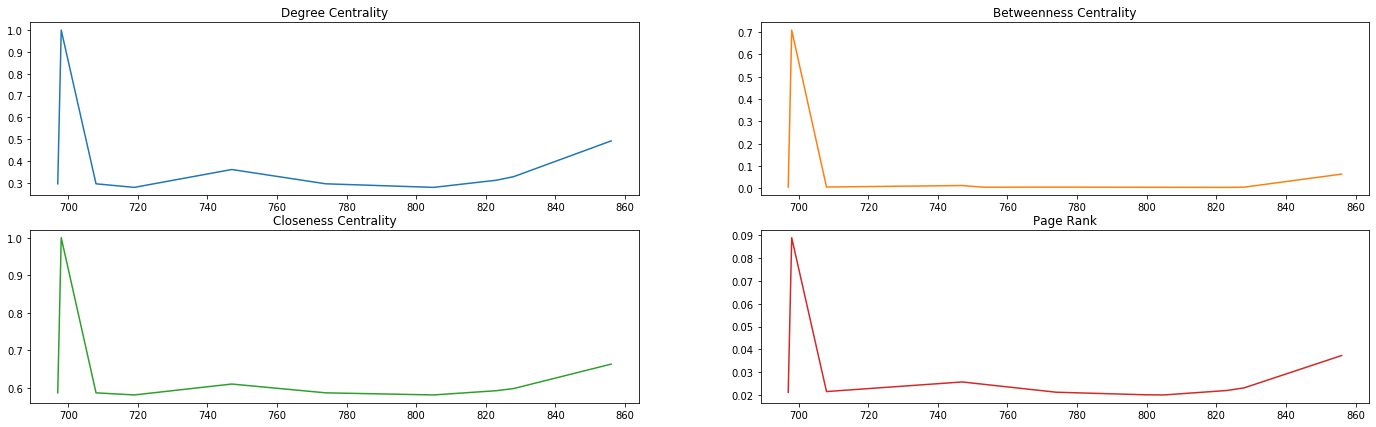

In [112]:
#Creating subplots for multiple tuples
fig, axs = plt.subplots(2, 2)
list1_ = sorted(list1.items())
x1, y1 = zip(*list1_)
list2_ = sorted(list2.items())
x2, y2 = zip(*list2_)
list3_ = sorted(list3.items())
x3, y3 = zip(*list3_)
list4_ = sorted(list4.items())
x4, y4 = zip(*list4_)

#Assigning axis to the subplots
axs[0, 0].plot(x1, y1)
axs[0, 0].set_title('Degree Centrality')
axs[0, 1].plot(x2, y2, 'tab:orange')
axs[0, 1].set_title('Betweenness Centrality')
axs[1, 0].plot(x3, y3, 'tab:green')
axs[1, 0].set_title('Closeness Centrality')
axs[1, 1].plot(x4, y4, 'tab:red')
axs[1, 1].set_title('Page Rank')